In [135]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")
from sklearn import model_selection




# Importing Dataset

In [136]:
df = pd.read_csv('fishdatset.csv')
print(df.head(5))
print("Shape of Dataset: ", df.shape)



    ph  temperature  turbidity   fish
0  6.0         27.0        4.0  katla
1  7.6         28.0        5.9   sing
2  7.8         27.0        5.5   sing
3  6.5         31.0        5.5  katla
4  8.2         27.0        8.5  prawn
Shape of Dataset:  (591, 4)


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ph           591 non-null    float64
 1   temperature  591 non-null    float64
 2   turbidity    591 non-null    float64
 3   fish         591 non-null    object 
dtypes: float64(3), object(1)
memory usage: 18.6+ KB


In [138]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,591.0,7.532115,0.810588,5.5,6.99,7.50,8.200,9.0
temperature,591.0,21.789306,4.536612,4.0,17.94,21.06,24.000,35.0
turbidity,591.0,4.432944,2.169062,1.0,3.48,3.57,4.005,15.8


In [139]:
df.value_counts('fish')

fish
tilapia      129
rui           99
pangas        78
katla         58
silverCup     55
shrimp        50
sing          49
karpio        33
koi           15
prawn         14
magur         11
dtype: int64

In [140]:
df.isnull().sum()

ph             0
temperature    0
turbidity      0
fish           0
dtype: int64

In [141]:
df.nunique()

ph              91
temperature     51
turbidity      108
fish            11
dtype: int64

In [142]:
df['fish'].unique()

array(['katla', 'sing', 'prawn', 'rui', 'koi', 'pangas', 'tilapia',
       'silverCup', 'karpio', 'magur', 'shrimp'], dtype=object)

In [143]:
df['fish'].value_counts()

tilapia      129
rui           99
pangas        78
katla         58
silverCup     55
shrimp        50
sing          49
karpio        33
koi           15
prawn         14
magur         11
Name: fish, dtype: int64

In [144]:
fish_summary = pd.pivot_table(df, index=['fish'], aggfunc='mean')
fish_summary

,ph,temperature,turbidity
fish,,,
karpio,7.236364,19.363636,7.684848
katla,7.717241,23.102759,3.736034
koi,6.673333,26.000000,4.618667
magur,7.236364,25.181818,7.709091
pangas,8.478462,20.987179,3.642051
prawn,7.892857,28.928571,6.315000
rui,7.062020,22.430707,3.749495
shrimp,7.154400,22.140000,6.833800
silverCup,6.832364,22.186909,3.876000


# VIZUALISATION

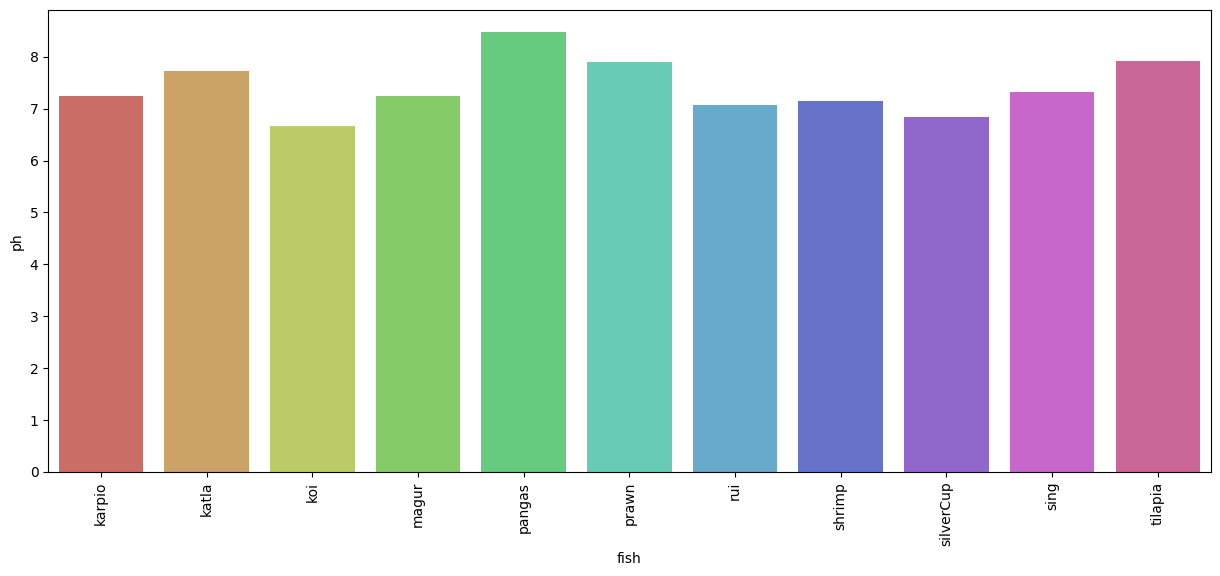

In [145]:
fish_summary_new = fish_summary.reset_index()
fish_summary_new


plt.figure(figsize=(15,6))
sns.barplot(y = 'ph', x = 'fish', data=fish_summary_new, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()


In [146]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [147]:
fig1 = px.bar(fish_summary_new, x='fish', y='temperature')
fig1.show()


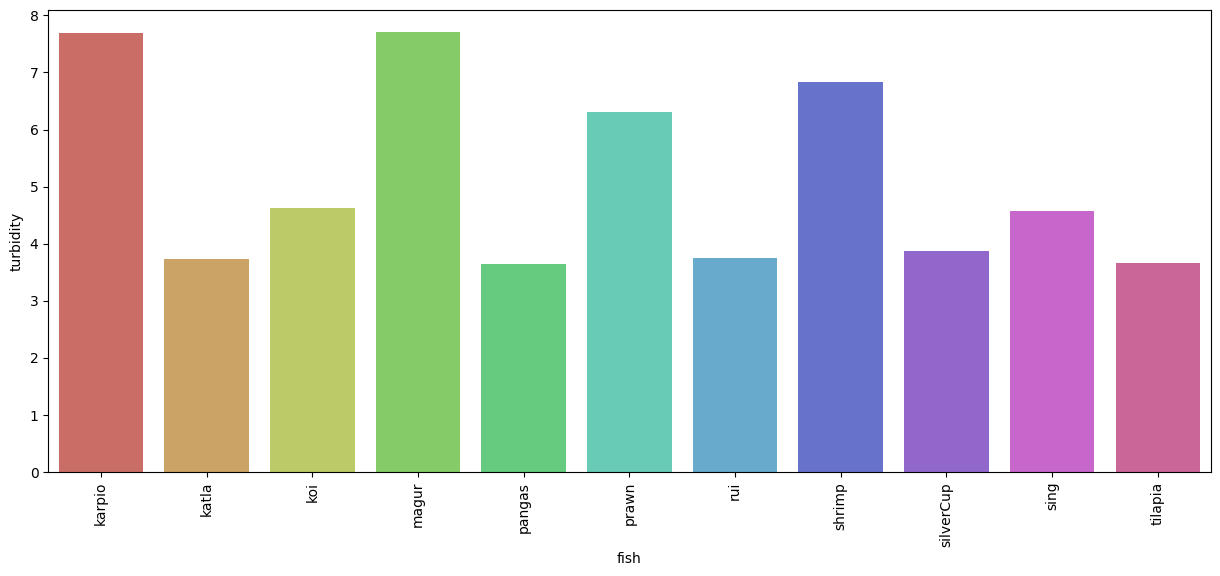

In [148]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'turbidity', x = 'fish', data=fish_summary_new, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()



In [149]:
colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']


In [150]:
import random


In [151]:
fish_summary_temp = fish_summary.sort_values(by='temperature', 
                                          ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : fish_summary_temp['temperature'][0:10].sort_values().index,
    'x' : fish_summary_temp['temperature'][0:10].sort_values()
}

last = {
    'y' : fish_summary_temp['temperature'][-10:].index,
    'x' : fish_summary_temp['temperature'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most temperatures required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least temperatures required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Temperatures",
                  plot_bgcolor='white',
                  font_size=7, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [152]:
fish_summary_temp = fish_summary.sort_values(by='ph', 
                                          ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : fish_summary_temp['ph'][0:10].sort_values().index,
    'x' : fish_summary_temp['ph'][0:10].sort_values()
}

last = {
    'y' : fish_summary_temp['ph'][-10:].index,
    'x' : fish_summary_temp['ph'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most ph required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least ph required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="PH",
                  plot_bgcolor='white',
                  font_size=7, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [153]:
fish_summary_temp = fish_summary.sort_values(by='turbidity', 
                                          ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : fish_summary_temp['turbidity'][0:10].sort_values().index,
    'x' : fish_summary_temp['turbidity'][0:10].sort_values()
}

last = {
    'y' : fish_summary_temp['turbidity'][-10:].index,
    'x' : fish_summary_temp['turbidity'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most Turbidity required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least Turbidity required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Turbidity",
                  plot_bgcolor='white',
                  font_size=7, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Separating Labels from Features

In [154]:
y = df['fish']
X = df.drop("fish",axis=1)
print("Labels:-")
print(y.head(5))
print("Features:-")
print(X.head(5))
print(X.shape)

Labels:-
0    katla
1     sing
2     sing
3    katla
4    prawn
Name: fish, dtype: object
Features:-
    ph  temperature  turbidity
0  6.0         27.0        4.0
1  7.6         28.0        5.9
2  7.8         27.0        5.5
3  6.5         31.0        5.5
4  8.2         27.0        8.5
(591, 3)


In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,
                                                    shuffle = True, random_state = 0)

# Data Preprocessing

In [156]:
from sklearn.preprocessing import StandardScaler
standardized_features = StandardScaler().fit_transform(X)
standardized_features = pd.DataFrame(standardized_features) 
print(standardized_features.head(5))


          0         1         2
0 -1.891730  1.149560 -0.199769
1  0.083819  1.370176  0.676928
2  0.330762  1.149560  0.492360
3 -1.274371  2.032022  0.492360
4  0.824650  1.149560  1.876618


# KNN MODEL

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#We have 2200 Points; 
#We split it such that we get 20% of the points(440) points in Test Dataset
X_train, X_test, y_train, y_test= model_selection.train_test_split(X,y, test_size=0.2, random_state=42)

print("==========================")
print("Train Data Shape")
print(X_train.shape)
print(y_train.shape)
print("===========================")
print("Test Data Shape")
print(X_test.shape)
print(y_test.shape)


Train Data Shape
(472, 3)
(472,)
Test Data Shape
(119, 3)
(119,)


In [158]:
# We are using Cross Validation for determining right value of K(Hyperparameter )

for i in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X_train.to_numpy(), y_train, cv=5, scoring='accuracy')
    print('\n Cross Validation Score for k = %d is ' % (i))
    print(score.mean())



 Cross Validation Score for k = 1 is 
0.8094288913773797

 Cross Validation Score for k = 3 is 
0.7499888017917133

 Cross Validation Score for k = 5 is 
0.6694288913773796

 Cross Validation Score for k = 7 is 
0.6481970884658456

 Cross Validation Score for k = 9 is 
0.6122060470324747

 Cross Validation Score for k = 11 is 
0.5952967525195969

 Cross Validation Score for k = 13 is 
0.607973124300112

 Cross Validation Score for k = 15 is 
0.5953415453527435

 Cross Validation Score for k = 17 is 
0.56996640537514

 Cross Validation Score for k = 19 is 
0.5784322508398656

 Cross Validation Score for k = 21 is 
0.56996640537514

 Cross Validation Score for k = 23 is 
0.5678611422172452

 Cross Validation Score for k = 25 is 
0.5488241881298992

 Cross Validation Score for k = 27 is 
0.5572228443449048

 Cross Validation Score for k = 29 is 
0.5572676371780515


In [159]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train.to_numpy(), y_train)
knn_pred = knn.predict(X_test.to_numpy())
knn_acc = accuracy_score(y_test, knn_pred, normalize=True) * float(100)
print('Test Accuracy Score for this Model is= %f%%' % (acc))

from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred))

Test Accuracy Score for this Model is= 0.394958%
              precision    recall  f1-score   support

      karpio       0.75      0.75      0.75         4
       katla       0.53      0.62      0.57        13
         koi       0.00      0.00      0.00         4
       magur       0.50      0.50      0.50         2
      pangas       0.62      0.62      0.62        13
       prawn       0.00      0.00      0.00         1
         rui       0.93      0.82      0.87        17
      shrimp       1.00      0.69      0.82        13
   silverCup       0.80      0.80      0.80        10
        sing       0.35      0.67      0.46         9
     tilapia       0.89      0.73      0.80        33

    accuracy                           0.68       119
   macro avg       0.58      0.56      0.56       119
weighted avg       0.74      0.68      0.70       119



# GAUSSIAN NAIVE BAYES MODEL

In [160]:
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
GNBclf.fit(X_train, y_train)
gnb_pred = GNBclf.predict(X_test)
score = cross_val_score(GNBclf, X_train, y_train, cv=5, scoring='accuracy')
avgCVScore=score.mean()
print("5-fold CV score for Naive Bayes:, ", avgCVScore)

gnb_acc = accuracy_score(y_test, gnb_pred)
print("\nGaussian Naive Bayes's Accuracy against Test Dataset:", acc)


from sklearn.metrics import classification_report
print("\n")
print(classification_report(y_test, gnb_pred))

5-fold CV score for Naive Bayes:,  0.42163493840985444

Gaussian Naive Bayes's Accuracy against Test Dataset: 0.3949579831932773


              precision    recall  f1-score   support

      karpio       1.00      1.00      1.00         4
       katla       0.50      0.15      0.24        13
         koi       0.00      0.00      0.00         4
       magur       1.00      1.00      1.00         2
      pangas       0.33      0.08      0.12        13
       prawn       0.00      0.00      0.00         1
         rui       0.24      0.65      0.35        17
      shrimp       1.00      0.38      0.56        13
   silverCup       0.00      0.00      0.00        10
        sing       0.00      0.00      0.00         9
     tilapia       0.51      0.67      0.58        33

    accuracy                           0.39       119
   macro avg       0.42      0.36      0.35       119
weighted avg       0.43      0.39      0.36       119



# LIGHTGBM MODEL 

In [161]:
import lightgbm as lgb
lgbclf = lgb.LGBMClassifier()
lgbclf.fit(X_train, y_train)
lgbclf.score(X_test, y_test)
lgbm_pred = lgbclf.predict(X_test.to_numpy())


In [162]:
from sklearn.metrics import accuracy_score
lgbm_acc=accuracy_score(lgbm_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, lgbm_pred)))
from sklearn.metrics import classification_report
print(classification_report(y_test, lgbm_pred))

LightGBM Model accuracy score: 0.8319
              precision    recall  f1-score   support

      karpio       1.00      0.50      0.67         4
       katla       0.68      1.00      0.81        13
         koi       0.33      0.25      0.29         4
       magur       1.00      1.00      1.00         2
      pangas       0.92      0.92      0.92        13
       prawn       0.00      0.00      0.00         1
         rui       0.93      0.82      0.87        17
      shrimp       0.93      1.00      0.96        13
   silverCup       0.91      1.00      0.95        10
        sing       0.57      0.44      0.50         9
     tilapia       1.00      0.85      0.92        33

    accuracy                           0.83       119
   macro avg       0.75      0.71      0.72       119
weighted avg       0.87      0.83      0.84       119



# DECISION TREE MODEL

In [163]:
from sklearn.tree import DecisionTreeClassifier  
dtc= DecisionTreeClassifier(criterion='entropy', random_state=0)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
from sklearn.metrics import accuracy_score
dtc_acc=accuracy_score(dtc_pred, y_test)
print('Decision Tree Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, dtc_pred)))
from sklearn.metrics import classification_report
print(classification_report(y_test, dtc_pred))




Decision Tree Model accuracy score: 0.8403
              precision    recall  f1-score   support

      karpio       0.75      0.75      0.75         4
       katla       0.71      0.92      0.80        13
         koi       0.25      0.25      0.25         4
       magur       1.00      1.00      1.00         2
      pangas       0.85      0.85      0.85        13
       prawn       0.00      0.00      0.00         1
         rui       1.00      0.82      0.90        17
      shrimp       1.00      1.00      1.00        13
   silverCup       0.91      1.00      0.95        10
        sing       0.67      0.67      0.67         9
     tilapia       0.97      0.85      0.90        33

    accuracy                           0.84       119
   macro avg       0.74      0.74      0.73       119
weighted avg       0.87      0.84      0.85       119



In [164]:
#PREDICTING VALUES 
dtc_pred = dtc.predict(X_test)
from sklearn.metrics import accuracy_score
x = accuracy_score(y_test, dtc_pred)
dtc_acc=accuracy_score(dtc_pred, y_test)
print("Decision Tree's Accuracy is: ", x*100)

print(classification_report(y_test,dtc_pred))

Decision Tree's Accuracy is:  84.03361344537815
              precision    recall  f1-score   support

      karpio       0.75      0.75      0.75         4
       katla       0.71      0.92      0.80        13
         koi       0.25      0.25      0.25         4
       magur       1.00      1.00      1.00         2
      pangas       0.85      0.85      0.85        13
       prawn       0.00      0.00      0.00         1
         rui       1.00      0.82      0.90        17
      shrimp       1.00      1.00      1.00        13
   silverCup       0.91      1.00      0.95        10
        sing       0.67      0.67      0.67         9
     tilapia       0.97      0.85      0.90        33

    accuracy                           0.84       119
   macro avg       0.74      0.74      0.73       119
weighted avg       0.87      0.84      0.85       119



# RANDOM FOREST

In [165]:
from sklearn.ensemble import RandomForestClassifier  
classifier_rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier_rf.fit(X_train, y_train)  
y_pred = classifier_rf.predict(X_test) 
from sklearn.metrics import accuracy_score
rfc_acc=accuracy_score(y_pred, y_test)
print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))




Random Forest Model accuracy score: 0.8151
              precision    recall  f1-score   support

      karpio       0.80      1.00      0.89         4
       katla       0.62      1.00      0.76        13
         koi       0.25      0.25      0.25         4
       magur       1.00      0.50      0.67         2
      pangas       0.83      0.77      0.80        13
       prawn       0.00      0.00      0.00         1
         rui       0.93      0.76      0.84        17
      shrimp       0.93      1.00      0.96        13
   silverCup       1.00      1.00      1.00        10
        sing       0.62      0.56      0.59         9
     tilapia       0.96      0.82      0.89        33

    accuracy                           0.82       119
   macro avg       0.72      0.70      0.70       119
weighted avg       0.84      0.82      0.82       119



# COMPARING MODELS


In [166]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier','Gaussian Bayes' ,'Random Forest Classifier', 'Light GBM Classifier'],
    'Score' : [lgbm_acc,knn_acc, dtc_acc, rfc_acc, gnb_acc]
})


models.sort_values(by = 'Score', ascending = False)


,Model,Score
1,Decision Tree Classifier,68.067227
2,Gaussian Bayes,0.840336
0,KNN,0.831933
3,Random Forest Classifier,0.815126
4,Light GBM Classifier,0.394958


In [167]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')


In [168]:

def recommendation(temperature,turbidity,ph):
    features = np.array([[temperature,turbidity,ph]])
    transformed_features = dtc.fit_transform(X)
    transformed_features = dtc.fit_transform(transformed_features)
    prediction = dtc.predict(transformed_features).reshape(1,-1)
    
    return prediction[0] 


# Saving our model on pickle file

In [169]:
clf=GaussianNB()
clf.fit(X, y)
import pickle
from joblib import dump, load
dump(clf, 'GNBClassifier.pkl')



['GNBClassifier.pkl']

In [170]:
# Mostly XGBoost models use data that must be encoded before training it whereby thr categorical transformers like labelencoders are used to change categorical daya to numerical data.
#Therefore:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)



In [171]:
# Scale the features using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)
X_train


array([[0.57142857, 0.66666667, 0.54054054],
       [0.14857143, 0.53533333, 0.17297297],
       [0.40857143, 0.53733333, 0.17364865],
       ...,
       [0.37142857, 0.54166667, 0.17635135],
       [0.40857143, 0.53333333, 0.16689189],
       [0.37142857, 0.8       , 0.18243243]])

In [172]:
# STANDARIZATION

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.03612656,  0.73428902,  2.25752747],
       [-1.87686853, -0.14062695, -0.40841321],
       [-0.74506097, -0.12730336, -0.40351258],
       ...,
       [-0.90674776, -0.09843557, -0.38391008],
       [-0.74506097, -0.15395055, -0.45251884],
       [-0.90674776,  1.62252858, -0.33980444]])

In [173]:
def recommendation(temperature,turbidity,ph):
    features = np.array([[temperature,turbidity,ph]])
    transformed_features = dtc.fit(X_train)
    transformed_features = dtc.fit(transformed_features)
    prediction = dtc.predict(transformed_features).reshape(1,-1)
    
    return prediction[0] 


In [174]:


temperature = 27
turbidity = 5.1
ph = 5 


predict = recommendation(temperature,turbidity,ph)


fish_dict = {1: "tilapia" , 2:"rui", 3:"pangas", 4:"katla", 5:"silverCup", 6:"shrimp", 7:"sing", 8:"karpio" , 9:"koi", 10:"prawn" ,11:"magur" }

if predict[0] in fish_dict:
    fish = fish_dict[predict[0]]
    print("{} is a best fish to be cultivated ".format(fish))
else:
    print("Sorry are not able to recommend a proper fish for this environment")


TypeError: DecisionTreeClassifier.fit() missing 1 required positional argument: 'y'